# Multivariate Linear Regresssion


    y = b0 + b1 * x1 + b2 * x2 + b3 * x3

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from mpl_toolkits import mplot3d

# Import csv

In [2]:
df=pd.read_csv('data/Salary_multiple.csv')

In [3]:
df.head()

,YearsExperience,Field,Salary
0,1.1,Technical,39343.0
1,1.3,Non-Technical,26205.0
2,1.5,Technical,37731.0
3,2.0,Non-Technical,28525.0
4,2.2,Technical,39891.0


# Simple Encoding

In [4]:
df.loc[:,'Field'].replace(['Technical','Non-Technical'],[0,1],inplace=True)

In [5]:
print(df.head())

   YearsExperience  Field   Salary
0              1.1      0  39343.0
1              1.3      1  26205.0
2              1.5      0  37731.0
3              2.0      1  28525.0
4              2.2      0  39891.0


# Splitting x and y

In [6]:
#split x and y
x=df.iloc[:,:-1].values
print(x)
y=df.iloc[:,2].values
print(y)

[[ 1.1  0. ]
 [ 1.3  1. ]
 [ 1.5  0. ]
 [ 2.   1. ]
 [ 2.2  0. ]
 [ 2.9  1. ]
 [ 3.   0. ]
 [ 3.2  1. ]
 [ 3.2  0. ]
 [ 3.7  0. ]
 [ 3.9  1. ]
 [ 4.   0. ]
 [ 4.   0. ]
 [ 4.1  0. ]
 [ 4.5  1. ]
 [ 4.9  1. ]
 [ 5.1  1. ]
 [ 5.3  0. ]
 [ 5.9  0. ]
 [ 6.   1. ]
 [ 6.8  1. ]
 [ 7.1  0. ]
 [ 7.9  0. ]
 [ 8.2  1. ]
 [ 8.7  0. ]
 [ 9.   1. ]
 [ 9.5  1. ]
 [ 9.6  0. ]
 [10.3  1. ]
 [10.5  0. ]]
[ 39343.  26205.  37731.  28525.  39891.  36642.  60150.  34445.  64445.
  57189.  43218.  55794.  56957.  57081.  41111.  47938.  56029.  83088.
  81363.  53940.  61738.  98273. 101302.  73812. 109431.  75582.  76969.
 112635.  82391. 121872.]


In [7]:
x=x.reshape(-1,2)
y=y.reshape(-1,1)

# Plot Data

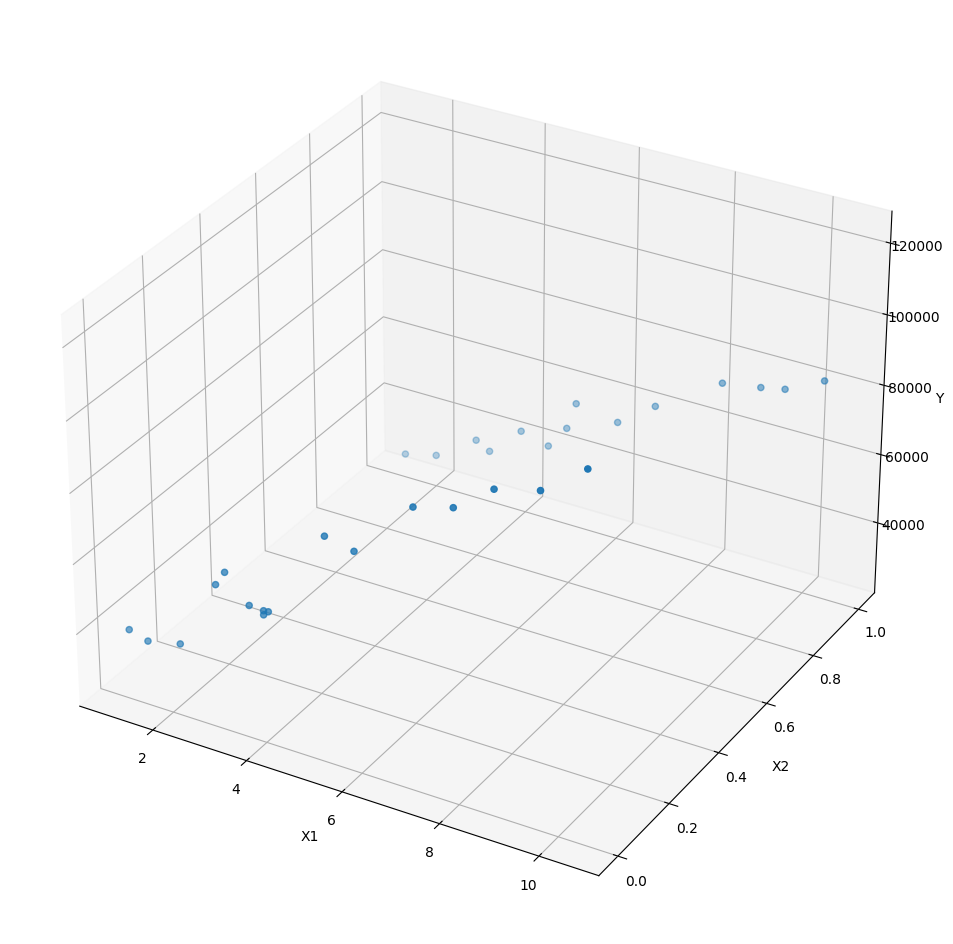

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

sequence_containing_x_vals = x[:,0]
sequence_containing_y_vals = x[:,1]
sequence_containing_z_vals = y

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

# Assignments

<li> Train </li>
<li> Evaluate Model </li>
<li> Plot the regression line and points </li>

In [18]:
df=pd.read_csv('data/Cancer.csv')

In [19]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df.__len__

<bound method DataFrame.__len__ of            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302         M       17.990        10.380          122.80   
1      842517         M       20.570        17.770          132.90   
2    84300903         M       19.690        21.250          130.00   
3    84348301         M       11.420        20.380           77.58   
4    84358402         M       20.290        14.340          135.10   
..        ...       ...          ...           ...             ...   
495    914333         B       14.870        20.210           96.12   
496    914366         B       12.650        18.170           82.69   
497    914580         B       12.470        17.310           80.45   
498    914769         M       18.490        17.520          121.30   
499         4    0.3857        1.428         2.548           19.15   

       area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0    1001.000000          0.11840           0.27760  

In [21]:
df.drop(columns='diagnosis')

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.990,10.380,122.80,1001.000000,0.11840,0.27760,0.30010,0.14710,0.241900,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.570,17.770,132.90,1326.000000,0.08474,0.07864,0.08690,0.07017,0.181200,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.690,21.250,130.00,1203.000000,0.10960,0.15990,0.19740,0.12790,0.206900,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.420,20.380,77.58,386.100000,0.14250,0.28390,0.24140,0.10520,0.259700,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.290,14.340,135.10,1297.000000,0.10030,0.13280,0.19800,0.10430,0.180900,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,914333,14.870,20.210,96.12,680.900000,0.09587,0.08345,0.06824,0.04951,0.148700,...,28.48,103.90,783.6,0.1216,0.1388,0.1700,0.1017,0.2369,0.06599,NaN
496,914366,12.650,18.170,82.69,485.600000,0.10760,0.13340,0.08017,0.05074,0.164100,...,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.1407,0.3230,0.10330,NaN
497,914580,12.470,17.310,80.45,480.100000,0.08928,0.07630,0.03609,0.02369,0.152600,...,24.34,92.82,607.3,0.1276,0.2506,0.2028,0.1053,0.3035,0.07661,NaN
498,914769,18.490,17.520,121.30,1068.000000,0.10120,0.13170,0.14910,0.09183,0.183200,...,22.88,146.40,1600.0,0.1412,0.3089,0.3533,0.1663,0.2510,0.09445,NaN


In [22]:
df.loc[:,'diagnosis'].replace(['M','B'],[0,1],inplace=True)


In [23]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         0        17.99         10.38          122.80     1001.0   
1    842517         0        20.57         17.77          132.90     1326.0   
2  84300903         0        19.69         21.25          130.00     1203.0   
3  84348301         0        11.42         20.38           77.58      386.1   
4  84358402         0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [24]:
#split x and y
x=df.iloc[:,0].values
print(x)
y=df.iloc[:,2].values
print(y)

[   842302    842517  84300903  84348301  84358402    843786    844359
  84458202    844981  84501001    845636  84610002    846226    846381
  84667401  84799002    848406  84862001    849014   8510426   8510653
   8510824   8511133    851509    852552    852631    852763    852781
    852973    853201    853401    853612  85382601    854002    854039
    854253    854268    854941    855133    855138    855167    855563
    855625    856106  85638502    857010  85713702     85715    857155
    857156    857343    857373    857374    857392    857438  85759902
    857637    857793    857810    858477    858970    858981    858986
    859196  85922302    859283    859464    859465    859471    859487
    859575    859711    859717    859983   8610175   8610404   8610629
   8610637   8610862   8610908    861103   8611161   8611555   8611792
   8612080   8612399  86135501  86135502    861597    861598    861648
    861799    861853    862009    862028     86208     86211    862261
    86

In [25]:
x=x.reshape(-1,20)
y=y.reshape(-1,1)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (25,) and arg 2 with shape (500,).

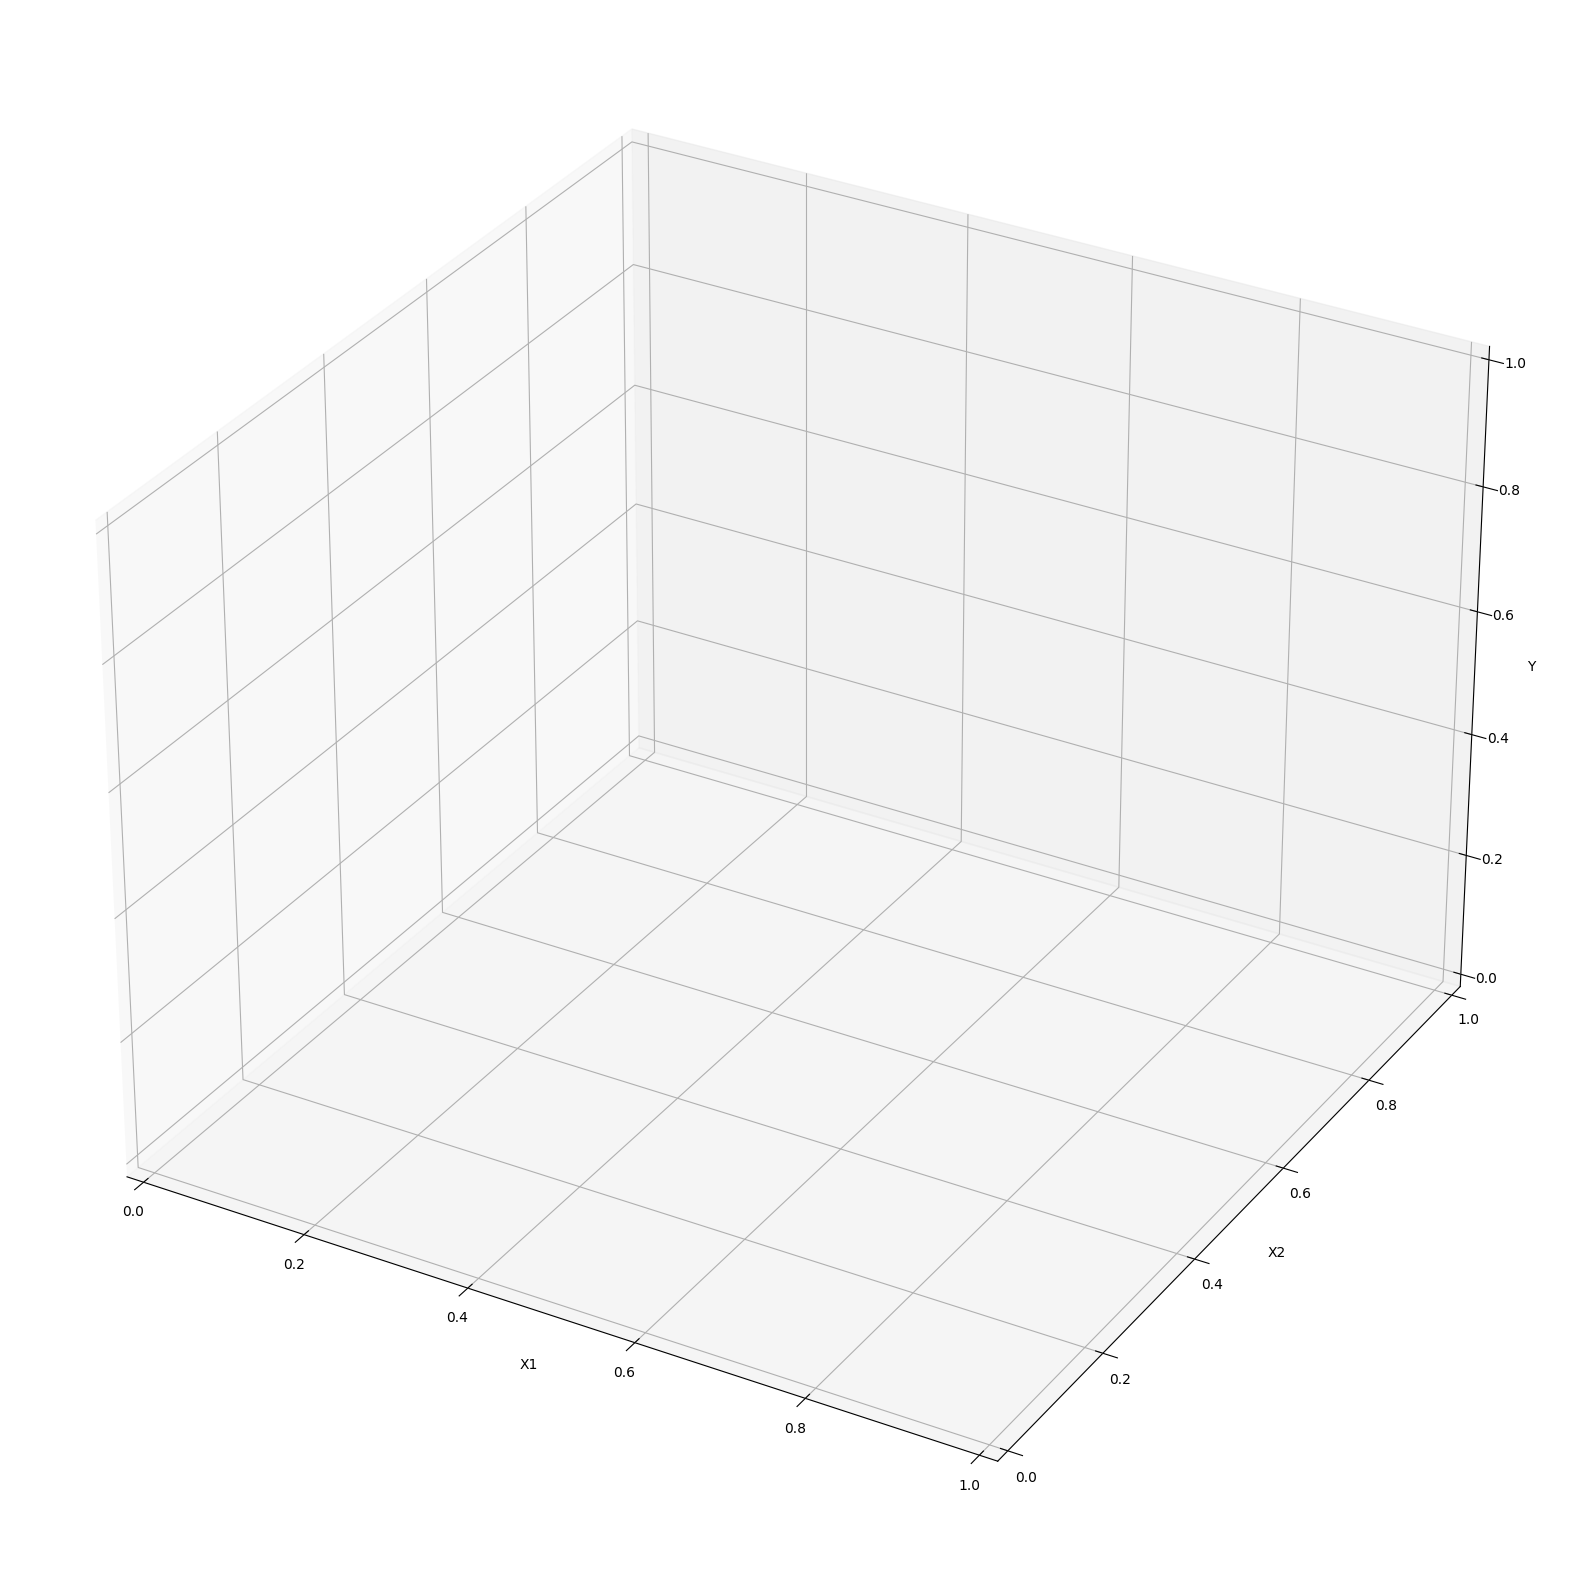

In [28]:
fig = plt.figure(figsize=(20, 25))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

sequence_containing_x_vals = x[:,0]
sequence_containing_y_vals = x[:,1]
sequence_containing_z_vals = y

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()